# Project Neural Networks e Deep Learning

<hr style="border: none; height: 2px; background-color: black; margin: 0;">

### Importando Bibliotecas 

In [3]:
import pandas as pd
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, accuracy_score, make_scorer, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from keras.optimizers import Adam
from sklearn.base import BaseEstimator, ClassifierMixin
from keras.layers import Dense, Dropout

<hr style="border: none; height: 2px; background-color: black; margin: 0;">

### Carregando dados

In [4]:
dados = pd.read_csv('dados/soybean.csv')

<hr style="border: none; height: 2px; background-color: black; margin: 0;">

### Pré-processamento dos dados

In [5]:
dados.head()

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,class
0,october,normal,gt-norm,norm,yes,same-lst-yr,low-areas,pot-severe,none,90-100,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
1,august,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,severe,fungicide,80-89,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
2,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,fungicide,lt-80,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
3,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,none,80-89,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
4,october,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,pot-severe,none,lt-80,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker


Formato dos dados

In [6]:
print('Quantidade de Linhas: ', dados.shape[0])
print('Quantidade de Colunas: ', dados.shape[1])

Quantidade de Linhas:  683
Quantidade de Colunas:  36


Tipos dos dados

In [7]:
dados.dtypes

date               object
plant-stand        object
precip             object
temp               object
hail               object
crop-hist          object
area-damaged       object
severity           object
seed-tmt           object
germination        object
plant-growth       object
leaves             object
leafspots-halo     object
leafspots-marg     object
leafspot-size      object
leaf-shread        object
leaf-malf          object
leaf-mild          object
stem               object
lodging            object
stem-cankers       object
canker-lesion      object
fruiting-bodies    object
external-decay     object
mycelium           object
int-discolor       object
sclerotia          object
fruit-pods         object
fruit-spots        object
seed               object
mold-growth        object
seed-discolor      object
seed-size          object
shriveling         object
roots              object
class              object
dtype: object

### Transformação dos dados 

O método utilizado abaixo é um procedimento de pré-processamento chamado "Label Encoding" ou "Codificação de Rótulos". O Label Encoding é uma técnica usada para transformar variáveis categóricas (ou seja, dados em formato de texto ou rótulos) em valores numéricos, tornando-os adequados para serem usados em algoritmos de aprendizado de máquina que requerem valores numéricos como entrada.

In [8]:
label_encoders = []
for i in range(dados.shape[1]):
    label_encoder = LabelEncoder()
    dados.iloc[:, i] = label_encoder.fit_transform(dados.iloc[:, i])
    label_encoders.append(label_encoder)

C:\Users\rafae\AppData\Local\Temp\ipykernel_7284\1260676894.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dados.iloc[:, i] = label_encoder.fit_transform(dados.iloc[:, i])
C:\Users\rafae\AppData\Local\Temp\ipykernel_7284\1260676894.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dados.iloc[:, i] = label_encoder.fit_transform(dados.iloc[:, i])
C:\Users\rafae\AppData\Local\Temp\ipykernel_7284\1260676894.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always se

Divisão dos dados que serão usados para o modelo e a classe

In [9]:
previsores = dados.iloc[:, :-1]
classe = dados.iloc[:, -1]

Transformação da classe para o formato "dummy"

In [10]:
classe_dummy = to_categorical(classe)
classe_dummy

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Formato dos dados 

In [11]:
print('Quantidade de Linhas: ', classe_dummy.shape[0])
print('Quantidade de Colunas: ', classe_dummy.shape[1])

Quantidade de Linhas:  683
Quantidade de Colunas:  19


Divisão da base de dados entre treinamento e teste (30% para testar e 70% para treinar)

In [12]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe_dummy,
                                                                  test_size = 0.3,
                                                                  random_state = 0)

## Métodos 

## Redes neurais artificiais

Criação da estrutura da rede neural com a classe Sequential (sequência de camadas)

In [238]:
del modelo
modelo = Sequential()

Primeira camada oculta, 16 neuronios, 35 neuronios de entrada

In [239]:
modelo.add(Dense(units=18, input_dim=35, activation='relu'))

Segunda camada oculta

In [240]:
modelo.add(Dense(units=19, activation='softmax'))

 Função softmax porque temos um problema de classificação com mais de duas classes 
(é gerada uma probabilidade em cada neurônio)

Visualização da estrutura da rede neural

In [241]:
modelo.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 18)                648       
                                                                 
 dense_51 (Dense)            (None, 19)                361       
                                                                 
Total params: 1009 (3.94 KB)
Trainable params: 1009 (3.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Configuração dos parâmetros da rede neural (adam = algoritmo para atualizar os pesos e loss = cálculo do erro)

In [242]:
modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Treinamento, dividindo a base de treinamento em uma porção para validação (validation_data)

In [243]:
modelo.fit(X_treinamento, y_treinamento, epochs=1000, validation_data=(X_teste, y_teste))

Epoch 1/1000
15/15 [==============================] - 1s 30ms/step - loss: 4.0865 - accuracy: 0.0314 - val_loss: 3.6277 - val_accuracy: 0.0390
Epoch 2/1000
15/15 [==============================] - 0s 8ms/step - loss: 3.3668 - accuracy: 0.0544 - val_loss: 3.1726 - val_accuracy: 0.0537
Epoch 3/1000
15/15 [==============================] - 0s 12ms/step - loss: 2.9954 - accuracy: 0.1067 - val_loss: 2.9519 - val_accuracy: 0.1171
Epoch 4/1000
15/15 [==============================] - 0s 8ms/step - loss: 2.8176 - accuracy: 0.1674 - val_loss: 2.8212 - val_accuracy: 0.1415
Epoch 5/1000
15/15 [==============================] - 0s 10ms/step - loss: 2.7015 - accuracy: 0.1820 - val_loss: 2.7381 - val_accuracy: 0.1561
Epoch 6/1000
15/15 [==============================] - 0s 6ms/step - loss: 2.6154 - accuracy: 0.1904 - val_loss: 2.6652 - val_accuracy: 0.1805
Epoch 7/1000
15/15 [==============================] - 0s 8ms/step - loss: 2.5370 - accuracy: 0.1987 - val_loss: 2.5995 - val_accuracy: 0.2000
Epo

Previsões

In [244]:
previsoes = modelo.predict(X_teste)

7/7 [==============================] - 0s 3ms/step


 Transformação dos rótulos (labels) de classe antes e depois da previsão feita pelo modelo de rede neural.

In [245]:
y_teste_matrix = [np.argmax(t) for t in y_teste]
y_previsao_matrix = [np.argmax(t) for t in previsoes]

Geração da matriz de confusão 

In [246]:
confusao = confusion_matrix(y_teste_matrix, y_previsao_matrix)
confusao

array([[ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0, 24,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,
         0,  0,  0],
       [ 0,  1, 13,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  6,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  1,  0,  0,  0, 18,  0,  0,  0,  0,  0,  0,  2,  0,  2,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 13,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0

 Matriz de confusão 

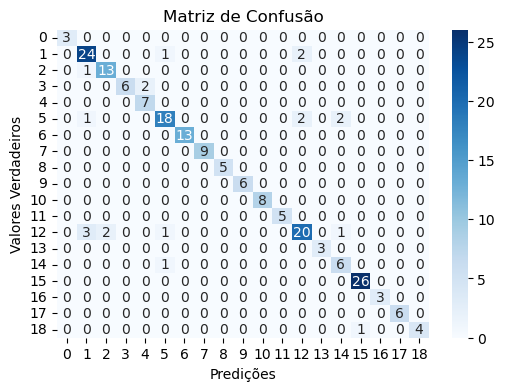

In [247]:
df = pd.DataFrame(confusao)
plt.figure(figsize=(6, 4))
sns.heatmap(df, annot=True, cmap='Blues', fmt='d')
plt.title('Matriz de Confusão')
plt.xlabel('Predições')
plt.ylabel('Valores Verdadeiros')
plt.show()

Acurácia

In [248]:
accuracy = accuracy_score(y_teste_matrix, y_previsao_matrix)
accuracy

0.9024390243902439

Precisão

In [249]:
precision = precision_score(y_teste_matrix, y_previsao_matrix, average='macro')
precision

0.9364282353393062

Recall

In [250]:
recall = recall_score(y_teste_matrix, y_previsao_matrix, average='macro')
recall

0.9341027689997943

F1-Score

In [251]:
f1 = f1_score(y_teste_matrix, y_previsao_matrix, average='macro')
f1

0.9320186287608551

<hr style="border: none; height: 2px; background-color: black; margin: 0;">

## Deep learning

Criação da estrutura da rede neural com a classe Sequential (sequência de camadas)

In [224]:
del modelo2
modelo2 = Sequential()

Camada densa com 18 neurônios e ativação ReLU, tendo uma entrada com 35 dimensões.
Camada de Dropout com taxa de 0.2 (desativação de 20% dos neurônios).

In [225]:
modelo2.add(Dense(units = 18, activation = 'relu', input_dim = 35))
modelo2.add(Dropout(0.2))

Outras duas camada densa com 18 neurônios cada e ativação ReLU. Outras camadas de Dropout com taxa de 0.2.

In [226]:
modelo2.add(Dense(units = 18, activation = 'relu'))
modelo2.add(Dropout(0.2))
modelo2.add(Dense(units = 18, activation = 'relu'))
modelo2.add(Dropout(0.2))

Camada de saída densa com 19 neurônios e ativação softmax.

In [227]:
modelo2.add(Dense(units = 19, activation = 'softmax'))

Informações detalhadas sobre as camadas e os parâmetros do modelo

In [228]:
modelo2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 18)                648       
                                                                 
 dropout_27 (Dropout)        (None, 18)                0         
                                                                 
 dense_47 (Dense)            (None, 18)                342       
                                                                 
 dropout_28 (Dropout)        (None, 18)                0         
                                                                 
 dense_48 (Dense)            (None, 18)                342       
                                                                 
 dropout_29 (Dropout)        (None, 18)                0         
                                                                 
 dense_49 (Dense)            (None, 19)               

Essa linha de código compila o modelo modelo2 com o otimizador 'adam', função de perda 'categorical_crossentropy' e usa a métrica de acurácia para avaliação. Em seguida, o modelo é treinado por 1000 épocas usando os dados de treinamento X_treinamento e y_treinamento, com validação usando os dados X_teste e y_teste, e o histórico de treinamento é armazenado na variável historico.

In [229]:
modelo2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
historico = modelo2.fit(X_treinamento, y_treinamento, epochs = 1000, validation_data = (X_teste, y_teste))

Epoch 1/1000
15/15 [==============================] - 2s 32ms/step - loss: 3.2787 - accuracy: 0.0649 - val_loss: 2.8404 - val_accuracy: 0.2049
Epoch 2/1000
15/15 [==============================] - 0s 8ms/step - loss: 2.9453 - accuracy: 0.1213 - val_loss: 2.7198 - val_accuracy: 0.2390
Epoch 3/1000
15/15 [==============================] - 0s 8ms/step - loss: 2.8217 - accuracy: 0.1192 - val_loss: 2.6477 - val_accuracy: 0.2488
Epoch 4/1000
15/15 [==============================] - 0s 8ms/step - loss: 2.6927 - accuracy: 0.1904 - val_loss: 2.5868 - val_accuracy: 0.2732
Epoch 5/1000
15/15 [==============================] - 0s 8ms/step - loss: 2.6673 - accuracy: 0.1757 - val_loss: 2.5512 - val_accuracy: 0.3122
Epoch 6/1000
15/15 [==============================] - 0s 8ms/step - loss: 2.6085 - accuracy: 0.2113 - val_loss: 2.5047 - val_accuracy: 0.3610
Epoch 7/1000
15/15 [==============================] - 0s 8ms/step - loss: 2.5473 - accuracy: 0.2427 - val_loss: 2.4653 - val_accuracy: 0.3707
Epoch

Gráfico para visualizar os erros e accuracy

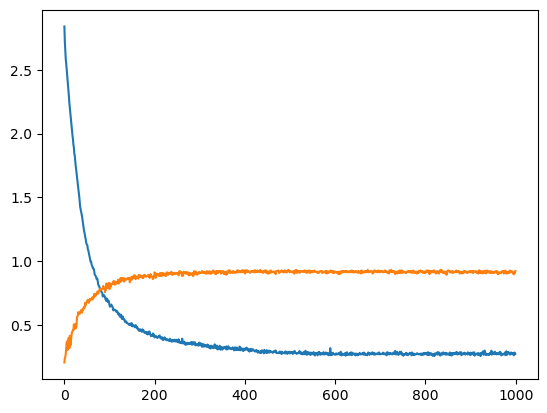

In [230]:
historico.history.keys()
#evolução do erro, azul
plt.plot(historico.history['val_loss'])
#performance da rede
plt.plot(historico.history['val_accuracy'])

Previsões

In [231]:
previsoes2 = modelo2.predict(X_teste)
previsoes2

7/7 [==============================] - 0s 4ms/step


array([[5.7940874e-09, 2.3614136e-03, 6.0059687e-12, ..., 1.1949965e-08,
        1.9641227e-08, 1.4802181e-16],
       [5.0067865e-37, 0.0000000e+00, 0.0000000e+00, ..., 2.2952692e-12,
        1.5412673e-24, 1.3496044e-09],
       [2.3578938e-05, 1.4916684e-24, 6.1337845e-18, ..., 3.3639481e-07,
        8.3971979e-12, 6.4784053e-11],
       ...,
       [1.8436836e-18, 4.9476898e-12, 6.6880014e-14, ..., 6.9023145e-07,
        9.9934822e-01, 2.5560837e-05],
       [1.1156787e-11, 9.2643855e-22, 1.8926590e-20, ..., 3.0521525e-04,
        8.7710478e-06, 1.8267430e-09],
       [0.0000000e+00, 0.0000000e+00, 8.0386728e-02, ..., 6.3348598e-30,
        4.9412472e-05, 7.5785810e-04]], dtype=float32)

Matriz de confusão

In [232]:
y_teste_matrix2 = [np.argmax(t) for t in y_teste]
y_previsoes_matrix2 = [np.argmax(t) for t in previsoes2]
confusao2 = confusion_matrix(y_teste_matrix2, y_previsoes_matrix2)
confusao2

array([[ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0, 25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,
         0,  0,  0],
       [ 0,  0, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  1,  0,  0,  0, 18,  0,  0,  0,  0,  0,  0,  2,  0,  2,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 12,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0

Gráfico da matriz de confusão para melhor visualização 

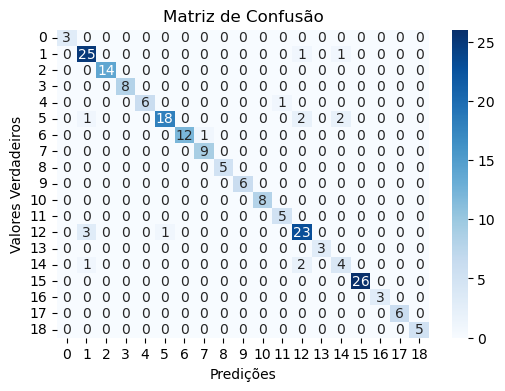

In [233]:
df2 = pd.DataFrame(confusao2)
plt.figure(figsize=(6, 4))
sns.heatmap(df2, annot=True, cmap='Blues', fmt='d')
plt.title('Matriz de Confusão')
plt.xlabel('Predições')
plt.ylabel('Valores Verdadeiros')
plt.show()

Acurácia

In [234]:
accuracy2 = accuracy_score(y_teste_matrix2, y_previsoes_matrix2)
accuracy2

0.9219512195121952

Precisão

In [235]:
precision2 = precision_score(y_teste_matrix, y_previsoes_matrix2, average='macro')
precision2

0.9424680121356023

Recall

In [236]:
recall2 = recall_score(y_teste_matrix, y_previsoes_matrix2, average='macro')
recall2

0.9427386750041211

F1-Score

In [237]:
f12 = f1_score(y_teste_matrix, y_previsoes_matrix2, average='macro')
f12

0.9411402263479826

<hr style="border: none; height: 2px; background-color: black; margin: 0;">